In [15]:
import pandas as pd
import numpy as np

In [16]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [17]:
df=pd.read_csv('../Day 20/train.csv',usecols=['Age','Fare','Survived'])

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(714, 3)

In [20]:
df.sample(5)

,Survived,Age,Fare
476,0,34.0,21.0000
6,0,54.0,51.8625
749,0,31.0,7.7500
210,0,24.0,7.0500
660,1,50.0,133.6500


In [21]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [22]:
x_train , x_test , y_train , y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [24]:
clf=DecisionTreeClassifier()

#understand data
clf.fit(x_train,y_train)

#predict output
y_pred=clf.predict(x_test)


In [25]:
accuracy_score(y_test,y_pred)

0.6223776223776224

In [26]:
np.mean(cross_val_score(DecisionTreeClassifier(), x,y,cv=10,scoring='accuracy'))

np.float64(0.6344874804381846)

# Now Using Discretization

In [38]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='kmeans')

In [39]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [40]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)
x_train_trf

array([[ 8.,  2.],
       [ 6.,  1.],
       [ 8.,  1.],
       ...,
       [11., 10.],
       [ 9.,  2.],
       [ 9.,  0.]])

In [41]:
pd.DataFrame(x_train_trf,columns=['Age','Fare'])

,Age,Fare
0,8.0,2.0
1,6.0,1.0
2,8.0,1.0
3,9.0,0.0
4,6.0,1.0
...,...,...
566,12.0,6.0
567,6.0,1.0
568,11.0,10.0
569,9.0,2.0


In [30]:
# debug

trf.named_transformers_['first'].n_bins_
trf.named_transformers_['second'].bin_edges_

array([array([  0.        ,  11.24103919,  19.86871564,  28.06543126,
               34.90886516,  45.73788324,  59.33660546,  72.27252098,
               84.10950431, 101.00790682, 123.56362348, 144.756475  ,
              185.67419167, 237.86718333, 385.651575  , 512.3292    ])],
      dtype=object)

In [31]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2=clf.predict(x_test_trf)

In [32]:
accuracy_score(y_test,y_pred2)

0.6433566433566433

In [33]:
x_tref=trf.fit_transform(x)

#np.mean(cross_val_score(DecisionTreeClassifier(),x_tref,y,cv=10,scoring='accuracy'))
score=cross_val_score(DecisionTreeClassifier(),x_tref,y,cv=10,scoring='accuracy')                                                 
score.mean()

np.float64(0.6556142410015648)

# Function


In [34]:
def discretize(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=bins , encode='ordinal' , strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=bins , encode='ordinal' , strategy=strategy)
    
    trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
    ])
    
    x_trf=trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x_tref,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Before Age')
    
    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title('After Age')
    
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('Before Fare')
    
    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title('Fare Fare')
    
    plt.show()
    
    

0.6556142410015648


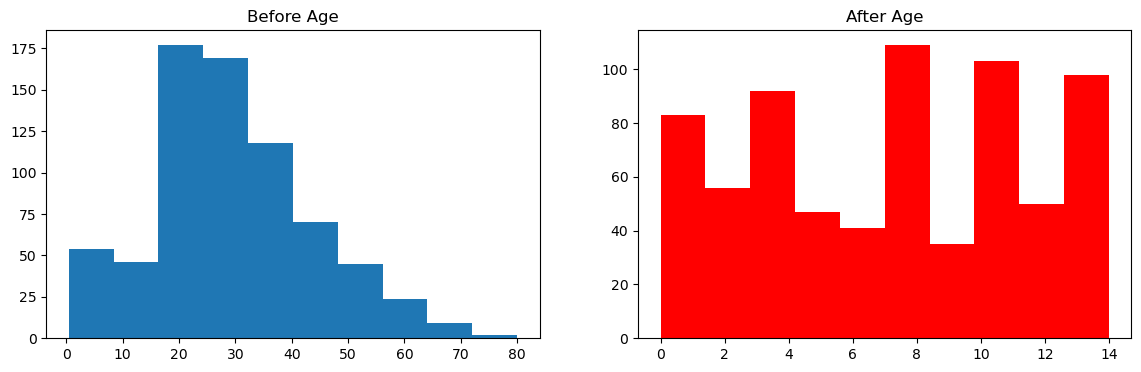

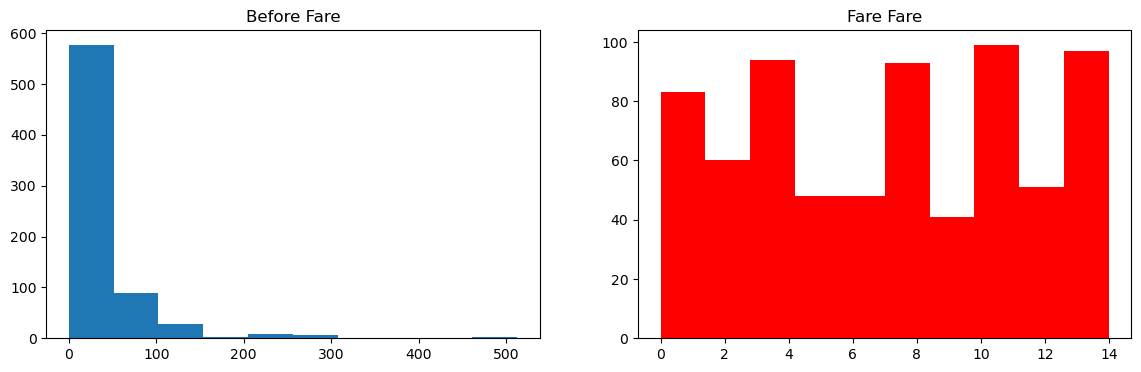

In [35]:
discretize(15,'quantile')